In [37]:
from tqdm import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt

external_path=''

In [38]:
def linear_separability_score_cav(positive_digit,negative_digit):
    perturbations_cav=np.load(f'{external_path}\\boundary_info\\perturbations_cav\\{positive_digit}_{negative_digit}.npy')
    perturbations_boundary_normals=np.load(f'{external_path}\\boundary_info\\perturbations_boundary_normals\\{positive_digit}_{negative_digit}.npy')
    dots=np.load(f'{external_path}\\boundary_info\\dots_cav\\{positive_digit}_{negative_digit}.npy')
    distances=np.load(f'{external_path}\\boundary_info\\distances\\{positive_digit}_{negative_digit}.npy')
    score=0
    for k in range(len(perturbations_cav)):
        perturbation_cav=perturbations_cav[k]
        perturbation_boundary_normal=perturbations_boundary_normals[k]
        dot=dots[k]
        score+=np.sqrt(perturbation_cav**2+perturbation_boundary_normal**2-2*perturbation_cav*perturbation_boundary_normal*dot)/distances[k]
    return score/len(perturbations_cav)

def linear_separability_score_cbv(positive_digit,negative_digit):
    perturbations_cbv=np.load(f'{external_path}\\boundary_info\\perturbations_cbv\\{positive_digit}_{negative_digit}.npy')
    perturbations_boundary_normals=np.load(f'{external_path}\\boundary_info\\perturbations_boundary_normals\\{positive_digit}_{negative_digit}.npy')
    dots=np.load(f'{external_path}\\boundary_info\\dots_cbv\\{positive_digit}_{negative_digit}.npy')
    distances=np.load(f'{external_path}\\boundary_info\\distances\\{positive_digit}_{negative_digit}.npy')
    score=0
    for k in range(len(perturbations_cbv)):
        perturbation_cbv=perturbations_cbv[k]
        perturbation_boundary_normal=perturbations_boundary_normals[k]
        dot=dots[k]
        score+=np.sqrt(perturbation_cbv**2+perturbation_boundary_normal**2-2*perturbation_cbv*perturbation_boundary_normal*dot)/distances[k]
    return score/len(perturbations_cbv)

In [39]:
linear_separability_scores_cav={}
linear_separability_scores_cbv={}

pbar=tqdm(range(10))
for positive_digit in pbar:
    for negative_digit in range(10):
        if negative_digit==positive_digit:
            continue
        pbar.set_description(f'{negative_digit}/9')
        score_cav=linear_separability_score_cav(positive_digit,negative_digit)
        score_cbv=linear_separability_score_cbv(positive_digit,negative_digit)
        linear_separability_scores_cav[f'{positive_digit}_{negative_digit}']=score_cav
        linear_separability_scores_cbv[f'{positive_digit}_{negative_digit}']=score_cbv

linear_separability_scores_cav_file=open(f'{external_path}\\boundary_info\\linear_separability_scores_cav','wb')
linear_separability_scores_cbv_file=open(f'{external_path}\\boundary_info\\linear_separability_scores_cbv','wb')
pickle.dump(linear_separability_scores_cav,linear_separability_scores_cav_file)
pickle.dump(linear_separability_scores_cbv,linear_separability_scores_cbv_file)
linear_separability_scores_cav_file.close()
linear_separability_scores_cbv_file.close()

4/9:   0%|          | 0/10 [00:00<?, ?it/s]

8/9: 100%|██████████| 10/10 [00:00<00:00, 27.30it/s]


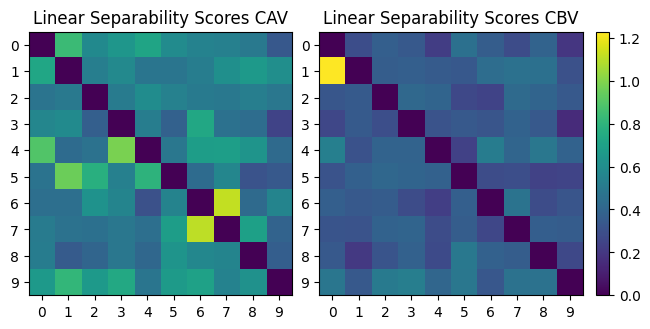

In [40]:
fig,axs=plt.subplots(nrows=1,ncols=2,layout='constrained')

scores_cav=np.zeros((10,10))
scores_cbv=np.zeros((10,10))
max_score=0
for n in range(10):
    for m in range(10):
        if n==m:
            continue
        scores_cav[n,m]=linear_separability_scores_cav[f'{n}_{m}']
        scores_cbv[n,m]=linear_separability_scores_cbv[f'{n}_{m}']
        max_score=max(max_score,max(linear_separability_scores_cav[f'{n}_{m}'],linear_separability_scores_cbv[f'{n}_{m}']))
im=axs[0].imshow(scores_cav,vmin=0,vmax=max_score)
im=axs[1].imshow(scores_cbv,vmin=0,vmax=max_score)
axs[0].set_xticks(range(10))
axs[0].set_yticks(range(10))
axs[0].set_title('Linear Separability Scores CAV')
axs[1].set_xticks(range(10))
axs[1].set_yticks(range(10))
axs[1].set_title('Linear Separability Scores CBV')
fig.colorbar(im,fraction=0.05)
plt.show()